In [1]:
import pandas as pd
import numpy as np
import time
import medpy.io.load as load
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
# Falta temrminar las rutas para los pacientes
# Ver que las mascaras estén con las T1
# En vez de que pase el arreglo en la funcion drop mejor paso uno pero que la funcion se llame en un for

In [2]:
pwd = os.getcwd().replace('codes', '')
print(pwd)

E:\repositorios\ai-course\


In [3]:
# Reading data
data = pd.read_csv('./patients_routes.csv', encoding='utf-8')
# data.head()

In [4]:
def dropPattern(patient):
    sep = '/VSD'
    text = patient
    stripped = patient.split(sep, 1)[0]
#    patients = []
#    for i in arr:
#        text = i
#        stripped = text.split(sep, 1)[0]
#        patients.append(stripped)
#        print(stripped)
    return stripped

In [5]:
mask_routes = data[data['routes'].str.contains('more')]
mask_routes = mask_routes['routes'].values.tolist()
mask_routes[:5]
#patient_mask = dropPattern(mask_routes) # Patients with masks

['data/HG/0001/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6560.mha',
 'data/HG/0002/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6562.mha',
 'data/HG/0003/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6564.mha',
 'data/HG/0004/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6566.mha',
 'data/HG/0005/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6568.mha']

In [9]:
full_routes = []
for i in range(data.shape[0]):
#    # path = base_path + '/' + data.iloc[i,0]
#    # path = os.path.join(pwd, data.iloc[i,0])
    path = data.iloc[i,0]
    full_routes.append(path)
#    if (i <= 5):
#        print(path)

In [10]:
df_routes = pd.DataFrame(full_routes, columns=(['Routes']))
T1 = df_routes[df_routes['Routes'].str.contains('T1c')]
T1 = T1['Routes'].values.tolist()
T1[:5]
#patientsT1 = dropPattern(T1)

['data/HG/0001/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.686.mha',
 'data/HG/0002/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.693.mha',
 'data/HG/0003/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.699.mha',
 'data/HG/0004/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.705.mha',
 'data/HG/0005/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.711.mha']

In [11]:
patients = []
for i in mask_routes:
    for j in T1:
        if (dropPattern(i) == dropPattern(j)):
            pat = [i, j]
            patients.append(pat)
patients[:5]
#print(len(patients))

[['data/HG/0001/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6560.mha',
  'data/HG/0001/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.686.mha'],
 ['data/HG/0002/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6562.mha',
  'data/HG/0002/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.693.mha'],
 ['data/HG/0003/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6564.mha',
  'data/HG/0003/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.699.mha'],
 ['data/HG/0004/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6566.mha',
  'data/HG/0004/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.705.mha'],
 ['data/HG/0005/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6568.mha',
  'data/HG/0005/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.711.mha']]

In [32]:
for i, j in patients:
    maskImage, maskHeader = load(pwd + i)
    maskImage = maskImage.astype('uint8')
    realImage, realHeader = load(pwd + j)
    realImage = realImage.astype('uint8')
    #Aqui se debe hacer toda la extracción de características
    # Multiplicar la máscara por el valor real y extraer la textura
    # print(maskImage.shape, realImage.shape)
    # time.sleep(.5)

In [33]:
#image, header = load(df_routes.iloc[-1, 0])

In [34]:
maskImage.shape

(162, 230, 230)

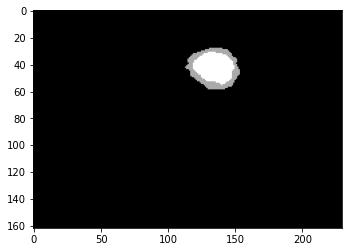

In [35]:
plt.imshow(maskImage[:,:,110], 'gray')

In [41]:
maskImage[maskImage != 3] = 0
maskImage[maskImage == 3] = 1

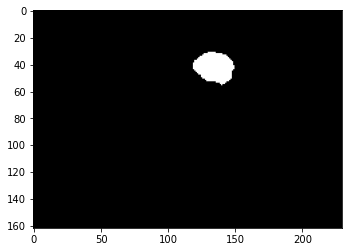

In [42]:
plt.imshow(maskImage[:,:,110], 'gray')

In [43]:
np.unique(maskImage[:,:,:])

array([0, 1], dtype=uint8)

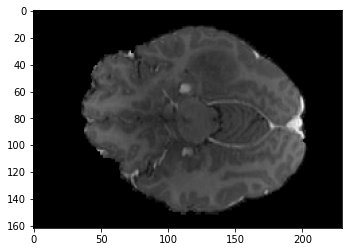

In [28]:
plt.imshow(realImage[:,:,110], 'gray')

In [44]:
result = maskImage * realImage

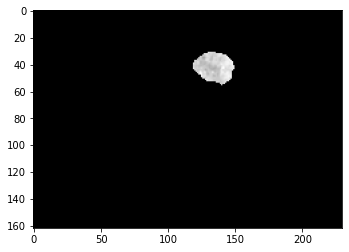

In [45]:
plt.imshow(result[:,:,110], 'gray')

In [46]:
np.unique(result[:,:,110])

array([ 0, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47], dtype=uint8)